In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sns.set()

### Read the csv file and checking the first five observation

In [6]:
df = pd.read_csv('coalv2.csv')
df.head()

,moistr,volmat,fixedc,ash,hydrgn,carbon,nitrgn,oxygen,sulfur,gcv
0,6.98,33.02,57.42,2.58,5.14,71.80,1.13,18.91,0.44,12312
1,11.15,26.39,58.32,4.14,5.05,66.71,1.40,22.10,0.60,11290
2,2.38,29.88,54.64,13.10,4.66,69.69,1.25,6.07,5.23,12674
3,3.38,28.61,40.39,27.62,4.30,55.02,1.15,6.78,5.13,10130
4,10.67,27.92,54.50,6.91,5.43,70.17,1.54,14.80,1.15,12559


In [7]:
coal = df.iloc[:5000, ]
coal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   moistr  5000 non-null   float64
 1   volmat  5000 non-null   float64
 2   fixedc  5000 non-null   float64
 3   ash     5000 non-null   float64
 4   hydrgn  5000 non-null   float64
 5   carbon  5000 non-null   float64
 6   nitrgn  5000 non-null   float64
 7   oxygen  5000 non-null   float64
 8   sulfur  5000 non-null   float64
 9   gcv     5000 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 390.8 KB


In [8]:
coal.describe()

,moistr,volmat,fixedc,ash,hydrgn,carbon,nitrgn,oxygen,sulfur,gcv
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,8.532248,32.682508,47.241944,11.538208,5.285984,64.492304,1.289086,15.235940,2.150102,11476.290600
std,10.663940,6.390744,10.713838,5.976976,0.735152,12.055869,0.353869,11.743269,1.846079,2262.927779
min,0.500000,3.000000,7.800000,0.900000,0.400000,4.650000,0.200000,0.200000,0.090000,2810.000000
25%,2.200000,29.200000,41.800000,7.100000,4.900000,59.200000,1.100000,7.700000,0.700000,10556.500000
50%,3.610000,33.825000,47.700000,10.500000,5.250000,67.400000,1.305000,10.620000,1.515000,12104.500000
75%,9.332500,37.100000,53.330000,14.900000,5.600000,72.955000,1.510000,18.000000,3.190000,13058.000000
max,57.200000,49.700000,87.000000,32.900000,8.200000,88.200000,5.600000,59.900000,17.300000,15193.000000


In [9]:
# selecting features and label
X = coal.iloc[:, :-1]  # features
y = coal.iloc[:,-1]  #label

In [10]:
[X.shape, y.shape]

[(5000, 9), (5000,)]

###  Split into train and test set
___
###  Standardization:
$$x^{'} = \frac{x - \bar{x}}{\sigma}$$

where, 
$\bar{x}$ = mean of a certain feature
$\sigma$ = standard deviation of a certain feature
___


In [11]:
# spliting into training and testing set for both X and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None )

# Standardization
from sklearn.preprocessing import StandardScaler

# transforming X_train value to feed to the model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# transforming X_test value for predicting for new cases
X_test_scaled = scaler.transform(X_test)

In [12]:

# function to convert seconds to into hours, minutes and seconds
# this function is used to measure the running time of any model
def convert(seconds):
    seconds = seconds % (24 * 3600)
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
      
    return "%d:%02d:%02d" % (hour, minutes, seconds)

### Loading the linear regression model from sklearn
### Fit the model, do the prediction

In [13]:
import time
from sklearn.linear_model import LinearRegression # LinearRegression, Ridge, LogisticRegression
regressor = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)

start = time.time() # starting of the time
# fit/train the model
regressor.fit(X_train_scaled,y_train)

end = time.time() # ending of the time
print('run_time:', convert(end - start), 'h:m:s')

#prediction using test cases or completely new cases
pred = regressor.predict(X_test_scaled)

run_time: 0:00:00 h:m:s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


### Saving trained model to a file and reading the same file using pickle module

In [14]:
# import pickle

# with open('trained_svm_model', 'wb') as f:
#    pickle.dump(regressor, f)

#with open('trained_svm_model', 'rb') as f:
#    mp = pickle.load(f)
#    mp.predict(X)

### Another approach for saving and reading the trained model using joblib module
- It is more efficient on objects that carry large numpy arrays internally as is often the case for fitted scikit-learn estimators

In [15]:
#from sklearn.externals import joblib
from joblib import dump, load
dump(regressor, 'trained_linear_regression_model.joblib') 

#clf = load('trained_linear_regression_model.joblib')

['trained_linear_regression_model.joblib']

### Model evaluation metrics for regression
**R_squared_score**:
$$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$$
**Explained_variance**:
$$(y, \hat{y}) = 1 - \frac{Var\{y-\hat{y}\}}{Var\{y\}}$$

**Max_error**:
$$(y, \hat{y}) = max(|y_i - \hat{y_i}|)$$

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

### Evaluation Metrics for testing set

In [16]:
# explained_variance
from sklearn.metrics import explained_variance_score
explained_variance = explained_variance_score(y_test, pred)

# r2_score
from sklearn.metrics import r2_score
r2 = r2_score(y_test,pred)

# max_error
from sklearn.metrics import max_error
max_error = max_error(y_test, pred)

# mean absolute error
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, pred)

# mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, pred)

# mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, pred)

# root mean squared error
RMSE = np.sqrt(MSE)

metrics = {
'Performance_metrics':['explained_variance', 'r_square_value', 'max_error', 'mean_absolute_error (MAE)',
                       'mean_squared_error (MSE)', 'root_mean_squared_error (RMSE)',
                       'mean_absolute_percentage_error (MAPE)'],
'Value':[explained_variance, r2, max_error, MAE, MSE, RMSE, MAPE]
}

performance_metrics = pd.DataFrame(metrics)
 

In [17]:
performance_metrics

,Performance_metrics,Value
0,explained_variance,0.991913
1,r_square_value,0.991913
2,max_error,6226.093485
3,mean_absolute_error (MAE),86.863772
4,mean_squared_error (MSE),43269.409789
5,root_mean_squared_error (RMSE),208.013004
6,mean_absolute_percentage_error (MAPE),0.008452


In [18]:
d = {
    'pred': pred,
    'y_test': y_test
}
# mvr = pd.DataFrame([pred, y_test], columns = ['pred', 'y_test']).transpose()
df = pd.DataFrame(d)
df = df.reset_index(drop=True)
df.to_csv("regression_mvr_plot.csv")

### Regression plot for testing set

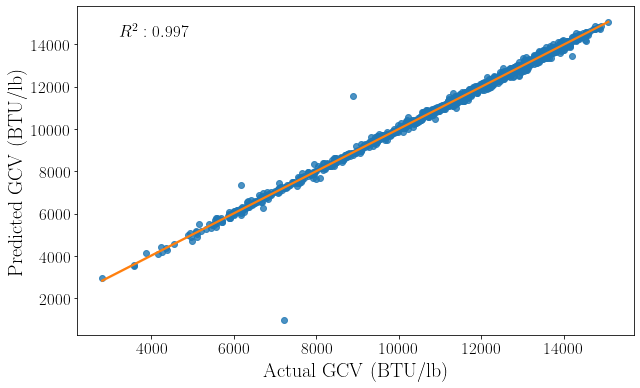

In [19]:
plt.figure(figsize=(9, 5.5))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({
    "text.usetex": True
})

sns.regplot(x=y_test, y=pred, scatter_kws={"color": "C0"}, line_kws={"color": "C1"})
plt.text(3225, 14389,"$R^2: 0.997$", fontsize=17, fontweight='bold')


plt.xlabel("Actual GCV (BTU/lb)", fontsize=20)
plt.ylabel("Predicted GCV (BTU/lb)", fontsize=20)
plt.xticks(fontsize=17, fontweight='bold')
plt.yticks(fontsize=17, fontweight='bold')

plt.tight_layout()
plt.savefig("regression_plot_mvr_v2.png", dpi=300)
plt.show()

In [20]:
# plt.figure(figsize=(12, 8))
# x, y = y_test, pred
# plt.scatter(x, y, color='blue', marker=(5,2))
# m, b = np.polyfit(x, y, 1)
# plt.plot(x, m*x + b, color='r')
# plt.xlabel("original test value")
# plt.ylabel("prediction")
# plt.title("Regression Plot")